In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, time
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error,r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [2]:
# Importing the Order dataset
order=pd.read_csv('D:\\New folder\\floward_restaurants_take_home_case_study\\orders.csv')
order.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds
0,2015-06-01 12:28:28.952789+01:00,2015-06-01 14:12:09.474896+01:00,59.90,1326,2,6220
1,2015-06-06 17:06:24.434807+01:00,2015-06-06 17:16:27.520253+01:00,24.00,1326,8,603
2,2015-06-08 14:56:15.503204+01:00,2015-06-08 15:03:39.397496+01:00,15.25,1326,3,443
3,2015-06-12 15:12:20.497925+01:00,2015-06-12 15:23:30.064683+01:00,28.05,1326,8,669
4,2015-06-01 13:07:10.794050+01:00,2015-06-01 14:02:25.104517+01:00,56.30,255,7,3314


In [3]:
# checking the datatype of each feature and presence of null values
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32394 entries, 0 to 32393
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_acknowledged_at  32394 non-null  object 
 1   order_ready_at         32394 non-null  object 
 2   order_value_gbp        32394 non-null  float64
 3   restaurant_id          32394 non-null  int64  
 4   number_of_items        32394 non-null  int64  
 5   prep_time_seconds      32394 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.5+ MB


In [4]:
# Reading restaurant data
restaurant=pd.read_csv('D:\\New folder\\floward_restaurants_take_home_case_study\\restaurants.csv')

In [5]:
#checking the datatype of each feature and presence of null values
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   restaurant_id  1697 non-null   int64 
 1   country        1697 non-null   object
 2   city           1697 non-null   object
 3   type_of_food   1697 non-null   object
dtypes: int64(1), object(3)
memory usage: 53.2+ KB


In [6]:
# Merging both the dataframes into 1 to get more insight about data based on restaurant id
df=order.merge(restaurant,on='restaurant_id',how='left')
df.head()

,order_acknowledged_at,order_ready_at,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds,country,city,type_of_food
0,2015-06-01 12:28:28.952789+01:00,2015-06-01 14:12:09.474896+01:00,59.90,1326,2,6220,UK,London,burritos
1,2015-06-06 17:06:24.434807+01:00,2015-06-06 17:16:27.520253+01:00,24.00,1326,8,603,UK,London,burritos
2,2015-06-08 14:56:15.503204+01:00,2015-06-08 15:03:39.397496+01:00,15.25,1326,3,443,UK,London,burritos
3,2015-06-12 15:12:20.497925+01:00,2015-06-12 15:23:30.064683+01:00,28.05,1326,8,669,UK,London,burritos
4,2015-06-01 13:07:10.794050+01:00,2015-06-01 14:02:25.104517+01:00,56.30,255,7,3314,UK,London,chinese


In [7]:
# checking shape of final data
df.shape
# It shows that there are 32394 rows along with 9 features

(32394, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32394 entries, 0 to 32393
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_acknowledged_at  32394 non-null  object 
 1   order_ready_at         32394 non-null  object 
 2   order_value_gbp        32394 non-null  float64
 3   restaurant_id          32394 non-null  int64  
 4   number_of_items        32394 non-null  int64  
 5   prep_time_seconds      32394 non-null  int64  
 6   country                32394 non-null  object 
 7   city                   32394 non-null  object 
 8   type_of_food           32394 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.5+ MB


In [9]:
# checking basic statistical values of continous features
df.describe()

,order_value_gbp,restaurant_id,number_of_items,prep_time_seconds
count,32394.000000,32394.000000,32394.000000,32394.000000
mean,26.547303,1290.555535,4.025715,1299.993857
std,19.263851,960.295504,2.392063,4404.573191
min,0.500000,3.000000,1.000000,0.000000
25%,16.700000,408.000000,3.000000,518.000000
50%,21.400000,1160.000000,3.000000,820.000000
75%,30.250000,2117.000000,5.000000,1227.000000
max,711.000000,3622.000000,38.000000,255499.000000


##### Feature Engineering

In [10]:
# converting country to categorical datatype
df['country']=df['country'].astype('category')
df.country.value_counts()
# From the below counts we can see that the UK is the main country where people prefer to order from restaurant as compared to other countriesb

UK         29689
France      2032
Ireland      353
Germany      320
Name: country, dtype: int64

In [11]:
# converting country to categorical datatype
df['city']=df['city'].astype('category')
df.city.value_counts()
# From the below counts we can see that the London is the main city where people prefer to order from restaurant as compared to other countries

London         25481
Paris           2032
Manchester       964
Brighton         652
Oxford           546
Edinburgh        440
Dublin           353
Berlin           296
Birmingham       278
Nottingham       226
Leeds            226
Cambridge        185
Glasgow          176
Liverpool        156
Reading          127
Guildford        115
Bristol           89
München           24
Cheltenham        11
Leicester         10
Cardiff            5
Southampton        2
Name: city, dtype: int64

In [12]:
# converting country to categorical datatype
df['type_of_food']=df['type_of_food'].astype('category')
df.type_of_food.value_counts()
# From the below counts we can see that Italian, Burgers, Thai are the top 3 cusines being preferred by people.

italian                 4759
burgers                 3916
thai                    2891
american                2395
japanese                1776
                        ... 
sans gluten / brunch       3
french lebanese            3
soup                       3
steakhouse                 2
japanese peruvian          1
Name: type_of_food, Length: 83, dtype: int64

In [13]:
# Extracting meaningfull information from order acknowledge date
df.order_acknowledged_at=pd.to_datetime(df.order_acknowledged_at,utc=True)
df['order_date']=df.order_acknowledged_at.dt.date
df['order_time']=df.order_acknowledged_at.dt.time
df['order_day']=df.order_acknowledged_at.dt.day_of_week
df['order_month']=df.order_acknowledged_at.dt.month

In [14]:
#df=df.groupby([df.restaurant_id,df.order_date]).apply(lambda x: x.sort_values(["order_time"], ascending = False)).reset_index(drop=True)

In [15]:
# creating new feature from time to get better understanding when was the order placed
df['time_of_day'] = np.where((df['order_time'].between(time(0),time(5))), 'night',
                            (np.where(df['order_time'].between(time(5),time(12)), 'morning',
                            (np.where(df['order_time'].between(time(12),time(17)), 'noon',
                            ((np.where(df['order_time'].between(time(17),time(20)), 'evening',
                            (np.where(df['order_time'].between(time(20),time(23)), 'night','none'))))))))))
df.time_of_day[df.time_of_day=='none']='night'

C:\Users\shiva\AppData\Local\Temp/ipykernel_19480/3603679488.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.time_of_day[df.time_of_day=='none']='night'


In [16]:
# converting country to categorical datatype
df['time_of_day']=df['time_of_day'].astype('category')
df.time_of_day.value_counts()
# From the below counts we can see that the London is the main city where people prefer to order from restaurant as compared to other countries

evening    13233
night      10547
noon        7457
morning     1157
Name: time_of_day, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32394 entries, 0 to 32393
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   order_acknowledged_at  32394 non-null  datetime64[ns, UTC]
 1   order_ready_at         32394 non-null  object             
 2   order_value_gbp        32394 non-null  float64            
 3   restaurant_id          32394 non-null  int64              
 4   number_of_items        32394 non-null  int64              
 5   prep_time_seconds      32394 non-null  int64              
 6   country                32394 non-null  category           
 7   city                   32394 non-null  category           
 8   type_of_food           32394 non-null  category           
 9   order_date             32394 non-null  object             
 10  order_time             32394 non-null  object             
 11  order_day              32394 non-null  int64          

##### Visualizing the data

##### Univariate Analysis

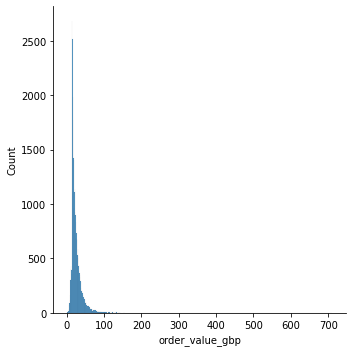

In [18]:
# We can see from below graph that most of the orders placed accross all countries lies between 0-100
sns.displot(data=df,x='order_value_gbp')

<AxesSubplot: >

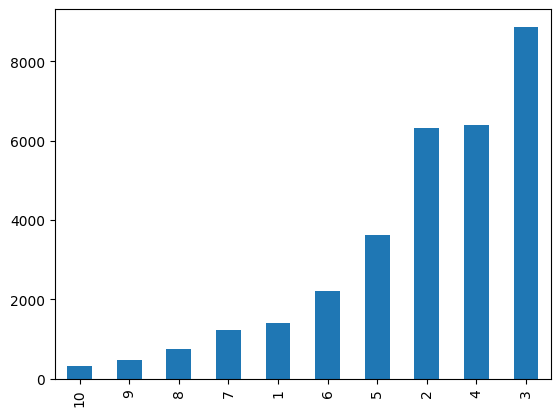

In [19]:
# Maximum orders were placed with 3 items in it
df.number_of_items.value_counts().nlargest(10).sort_values().plot(kind='bar')

<AxesSubplot: >

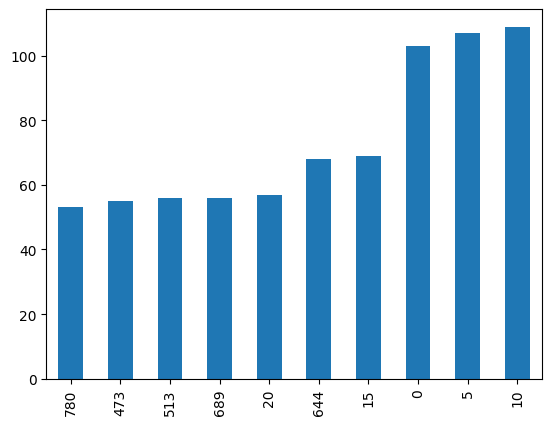

In [20]:
# There is a possibility that people tend to order more from where they can get order prepared asap
df.prep_time_seconds.value_counts().nlargest(10).sort_values().plot(kind='bar')

<AxesSubplot: >

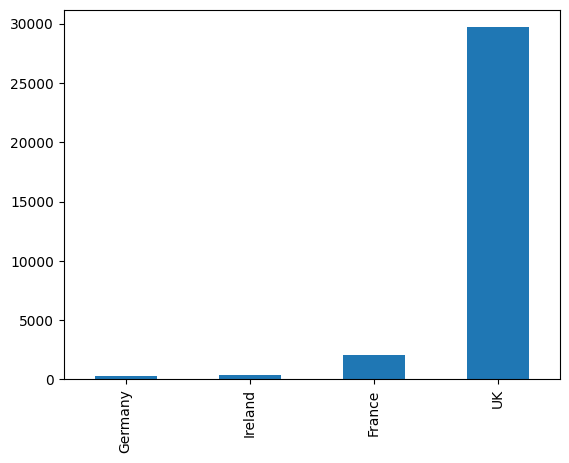

In [21]:
# UK shows the highest numbers of order placed
df.country.value_counts().nlargest(10).sort_values().plot(kind='bar')

<AxesSubplot: >

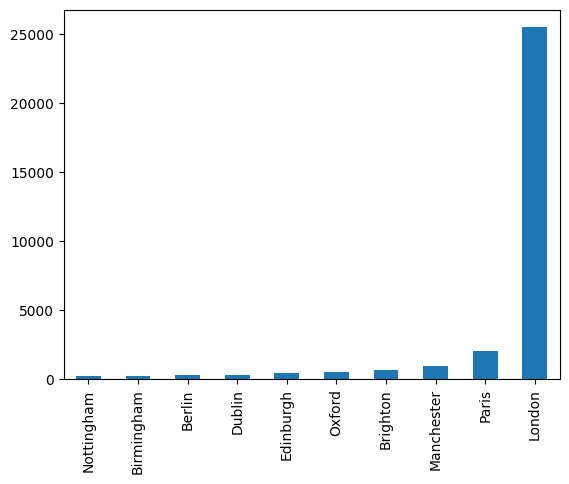

In [22]:
# People from london orders the most
df.city.value_counts().nlargest(10).sort_values().plot(kind='bar')

<AxesSubplot: >

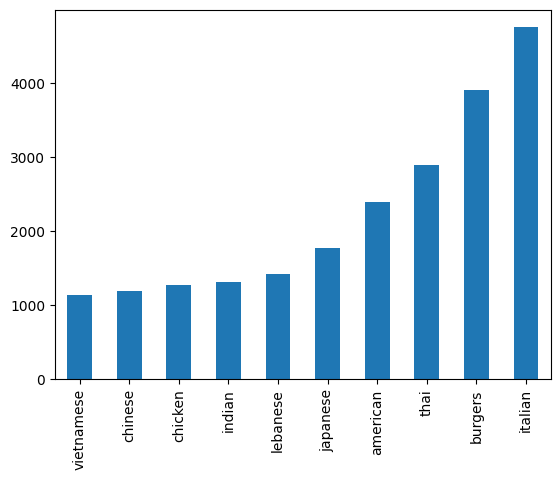

In [23]:
# People likes Italian the most 
df.type_of_food.value_counts().nlargest(10).sort_values().plot(kind='bar')

<AxesSubplot: >

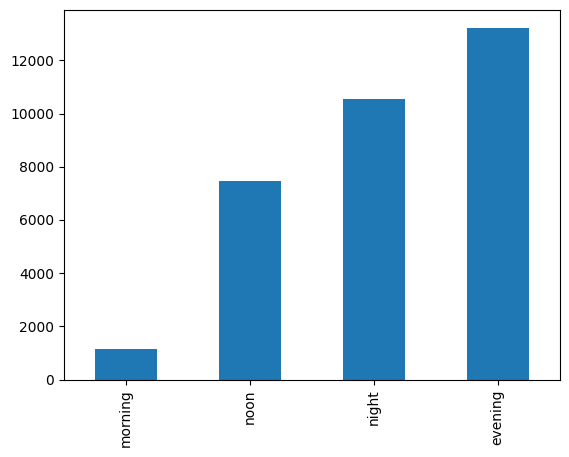

In [24]:
# People oders mmostly during evening
df.time_of_day.value_counts().nlargest(10).sort_values().plot(kind='bar')

<AxesSubplot: >

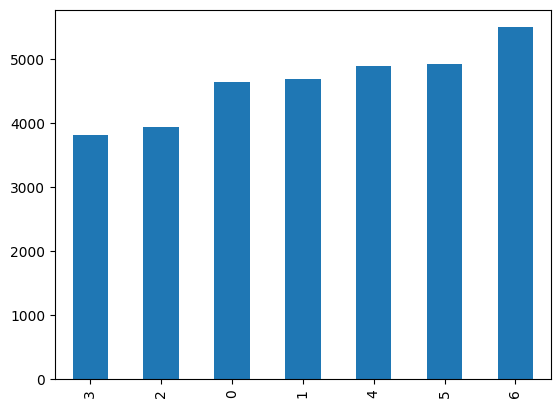

In [25]:
# On Friday, Saturday & Sunday restaurant gets most orders
df.order_day.value_counts().nlargest(10).sort_values().plot(kind='bar')

<AxesSubplot: >

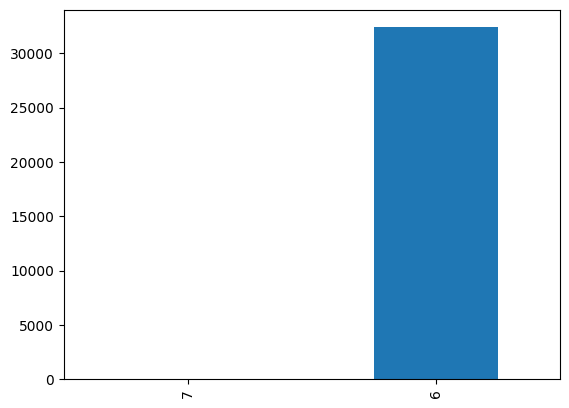

In [26]:
# This is not useful since the data only consist of orders from June
df.order_month.value_counts().nlargest(10).sort_values().plot(kind='bar')

##### Bi-variate Analysis

<AxesSubplot: xlabel='country', ylabel='city'>

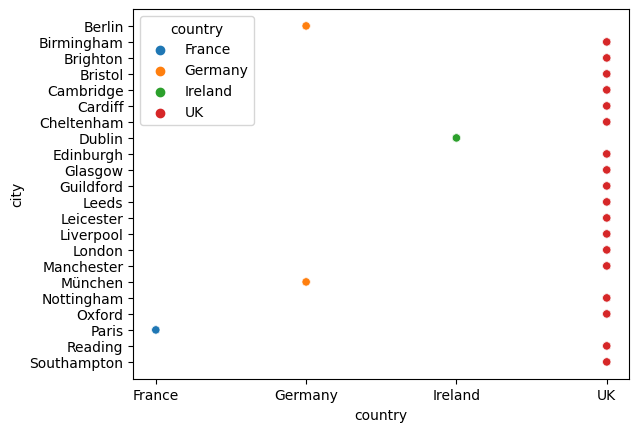

In [27]:
sns.scatterplot(data=df,x=df.country,y=df.city,hue=df.country)
# From below graph we can see that most of our data contains city of UK. There are only 1 or 2 cities in other countries . Which city
# earned the most?

<AxesSubplot: xlabel='country'>

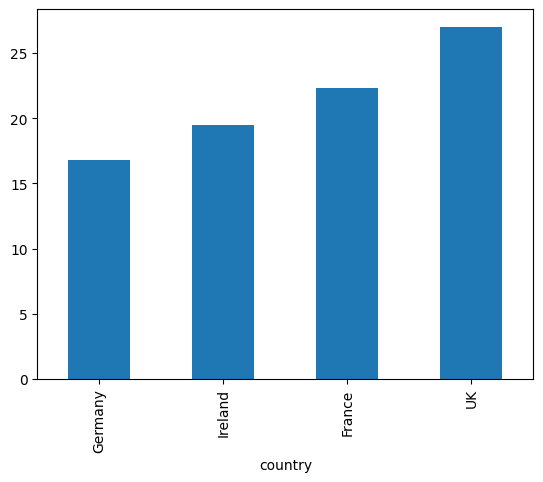

In [28]:
# from below graph we can clearly see that the average order price is higher in UK as compared to other countries
df.groupby([df.country])['order_value_gbp'].mean().sort_values().plot(kind='bar')

<AxesSubplot: xlabel='city'>

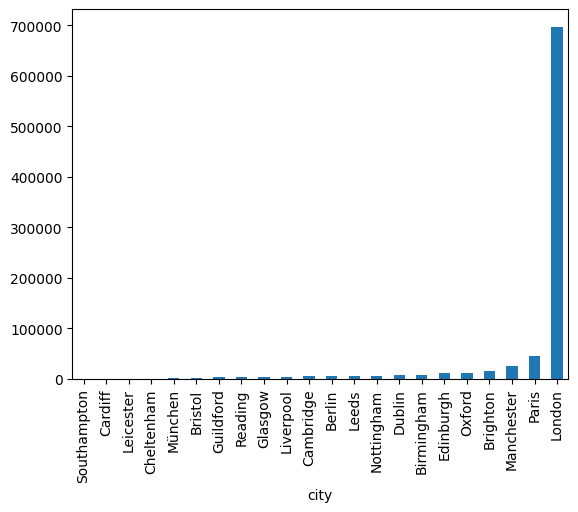

In [29]:
# from below graph we can clearly see that the London comes up on top when we talk about total amount of orders across different cities
df.groupby([df.city])['order_value_gbp'].sum().sort_values().plot(kind='bar')

<AxesSubplot: xlabel='city'>

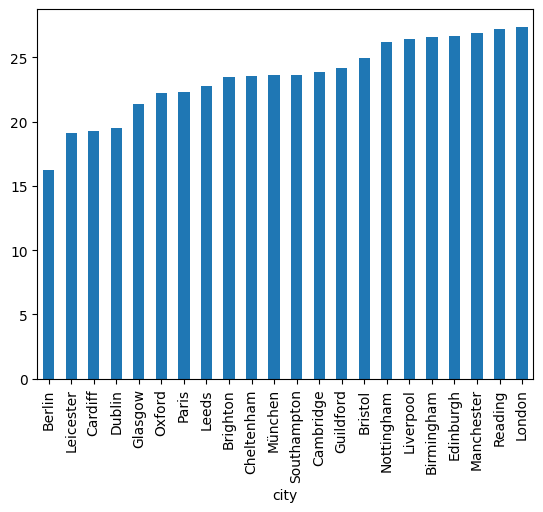

In [30]:
# from below graph we can clearly see that the average order price is among different cities
df.groupby([df.city])['order_value_gbp'].mean().sort_values().plot(kind='bar')

##### Which restaurant received the most order?

<AxesSubplot: >

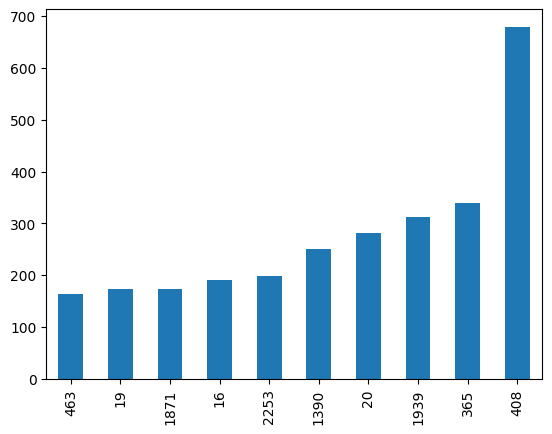

In [31]:
# from below graph we can clearly see that the restaurant with id 408 received the max order. But does that mean it did the most sale?
df.restaurant_id.value_counts().nlargest(10).sort_values().plot(kind='bar')

<AxesSubplot: xlabel='restaurant_id'>

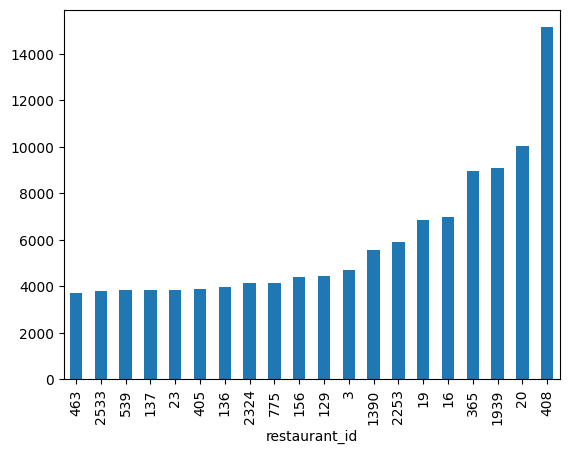

In [32]:
# from below graph we can clearly see that restaurant 408 was indeed the one with max sale
df.groupby([df.restaurant_id])['order_value_gbp'].sum().nlargest(20).sort_values().plot(kind='bar')

##### Which food people in a city loves the most?

<AxesSubplot: xlabel='city,None'>

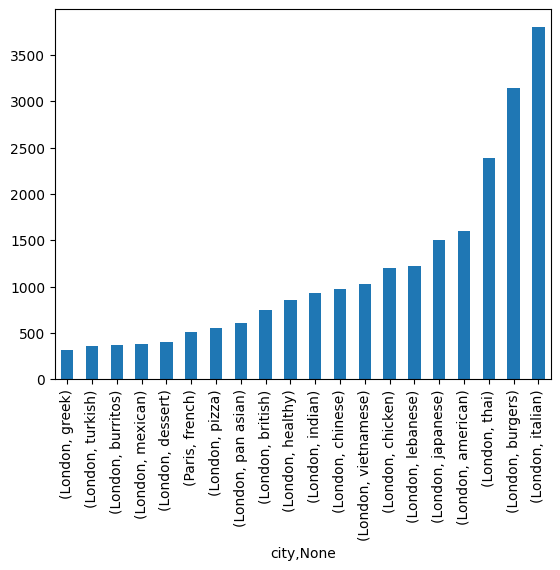

In [33]:
# from below graph we can clearly see that people from london loves italian
df.groupby([df.city])['type_of_food'].value_counts().nlargest(20).sort_values().plot(kind='bar')

<AxesSubplot: xlabel='city,None'>

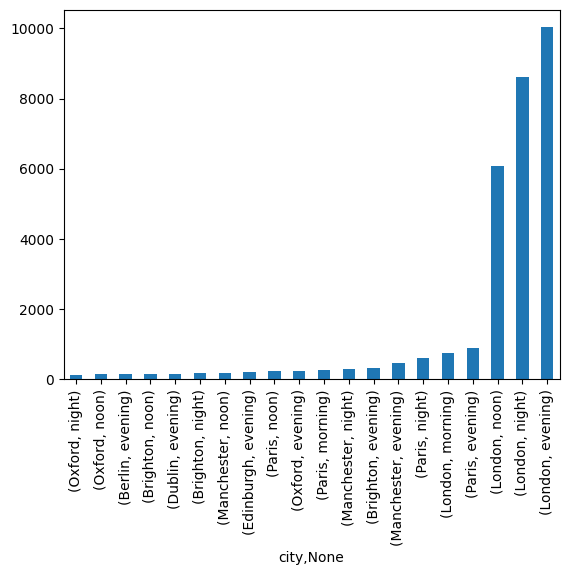

In [34]:
# Mostly people either order during evening or night
df.groupby([df.city])['time_of_day'].value_counts().nlargest(20).sort_values().plot(kind='bar')

<AxesSubplot: xlabel='number_of_items'>

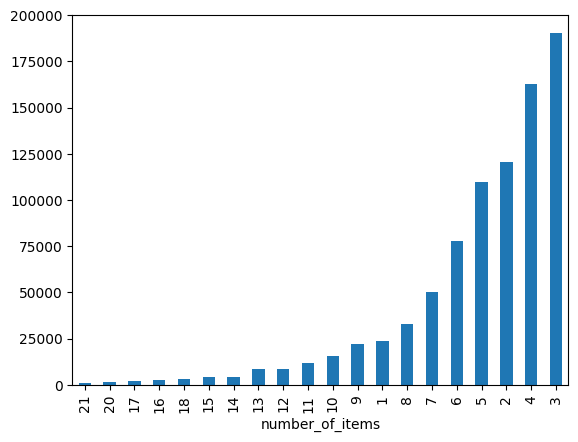

In [35]:
# Order with 3 items raised the max fund for restaurant
df.groupby([df.number_of_items])['order_value_gbp'].sum().nlargest(20).sort_values().plot(kind='bar')

skewness value of Fare:  2.451880914495884


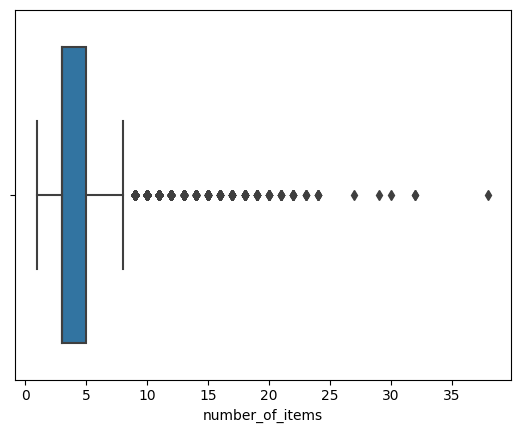

In [36]:
# from this graph we can clearly see the presence of outlier which can lead to poor performance of model. Also skewness should lie between -1 & 1
sns.boxplot(x=df.number_of_items)
print('skewness value of Fare: ',df.number_of_items.skew())

skewness value of Fare:  7.216283947197359


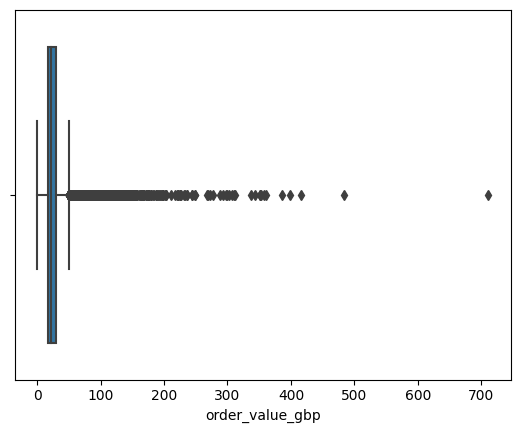

In [37]:
# from this graph we can clearly see the presence of outlier which can lead to poor performance of model. Also skewness should lie between -1 & 1
sns.boxplot(x=df.order_value_gbp)
print('skewness value of Fare: ',df.order_value_gbp.skew())

skewness value of Fare:  21.460127867474835


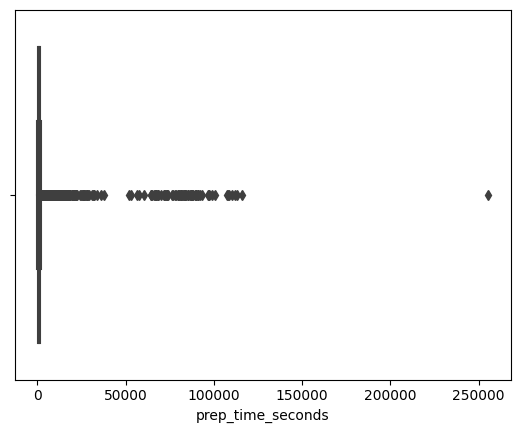

In [38]:
# from this graph we can clearly see the presence of outlier which can lead to poor performance of model. Also skewness should lie between -1 & 1
sns.boxplot(x=df.prep_time_seconds)
print('skewness value of Fare: ',df.prep_time_seconds.skew())

In [39]:
# Handling outliers using IQR
outlier_list=['prep_time_seconds','order_value_gbp','number_of_items']
for i in outlier_list:
    iqr_10=df[i].quantile(0.10)
    iqr_50=df[i].quantile(0.50)
    iqr_95=df[i].quantile(0.95)
    df[i] = np.where(df[i] > iqr_95, iqr_50, df[i])
    df[i] = np.where(df[i] < iqr_10, iqr_50, df[i])

skewness value of Fare:  1.0167208814839563


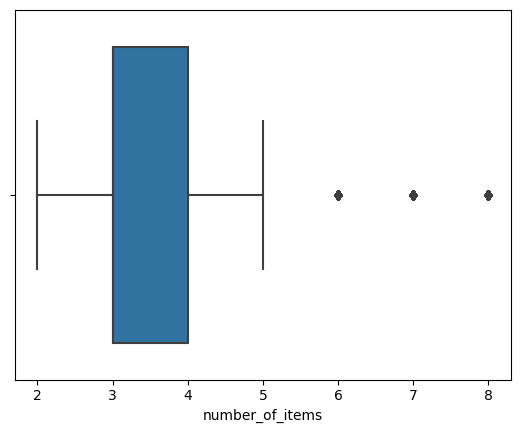

In [40]:
# from this graph we can clearly see the presence of change after outlier handling.
sns.boxplot(x=df.number_of_items)
print('skewness value of Fare: ',df.number_of_items.skew())

skewness value of Fare:  1.3727257567920506


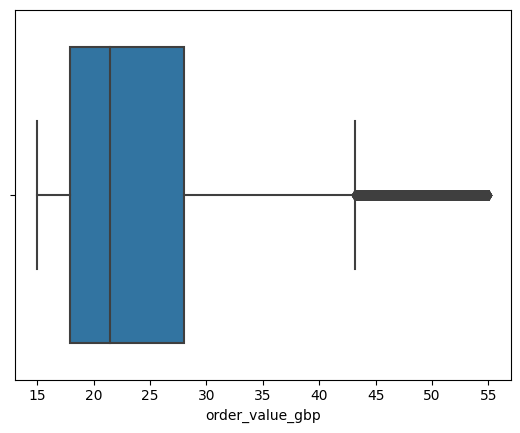

In [41]:
# from this graph we can clearly see the presence of change after outlier handling.
sns.boxplot(x=df.order_value_gbp)
print('skewness value of Fare: ',df.order_value_gbp.skew())

skewness value of Fare:  1.5599993532111363


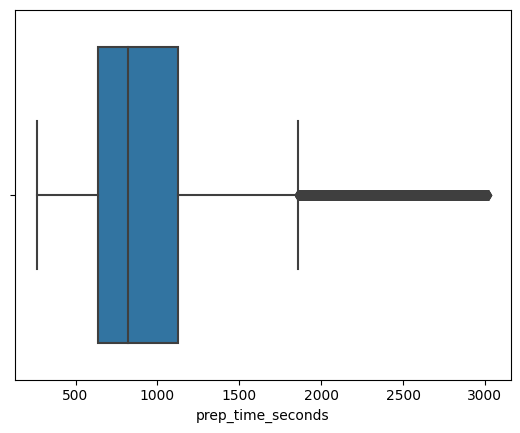

In [42]:
# from this graph we can clearly see the presence of change after outlier handling.
sns.boxplot(x=df.prep_time_seconds)
print('skewness value of Fare: ',df.prep_time_seconds.skew())

<AxesSubplot: xlabel='number_of_items', ylabel='order_value_gbp'>

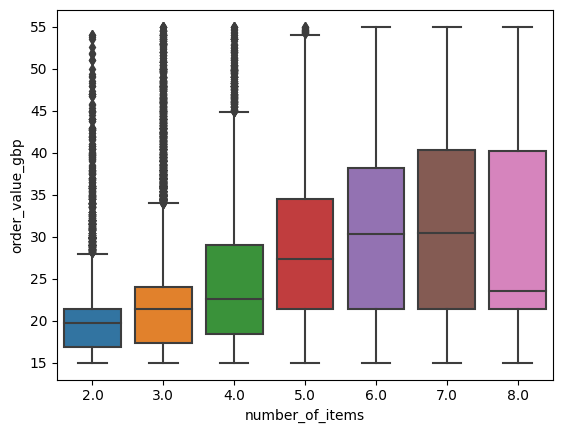

In [43]:
# from this graph we can clearly see the presence of outlier which can lead to poor performance of model.
sns.boxplot(x=df.number_of_items,y=df.order_value_gbp)

In [44]:
# Using Label-hot encoding to encode categorical variable since these are ordered
le=LabelEncoder()
le_list=['time_of_day','order_day','order_month']
for i in le_list:
    df[i]=le.fit_transform(df[i])


In [45]:
# Performing encoding for other categorical variables. Can't use one hot as it would result in numerous new features and can result in no information captured
be_list=['country','city','type_of_food']
base_encoder=ce.BaseNEncoder(cols=be_list,return_df=True,base=8)
encoded_data=base_encoder.fit_transform(df)

In [46]:
# Dropping columns which are not needed
drop_col_list=['order_acknowledged_at','order_ready_at','restaurant_id','order_date','order_time']
encoded_data.drop(columns=drop_col_list,axis=1,inplace=True)

In [47]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32394 entries, 0 to 32393
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_value_gbp    32394 non-null  float64
 1   number_of_items    32394 non-null  float64
 2   prep_time_seconds  32394 non-null  float64
 3   country_0          32394 non-null  int64  
 4   city_0             32394 non-null  int64  
 5   city_1             32394 non-null  int64  
 6   type_of_food_0     32394 non-null  int64  
 7   type_of_food_1     32394 non-null  int64  
 8   type_of_food_2     32394 non-null  int64  
 9   order_day          32394 non-null  int64  
 10  order_month        32394 non-null  int64  
 11  time_of_day        32394 non-null  int32  
dtypes: float64(3), int32(1), int64(8)
memory usage: 3.1 MB


<AxesSubplot: >

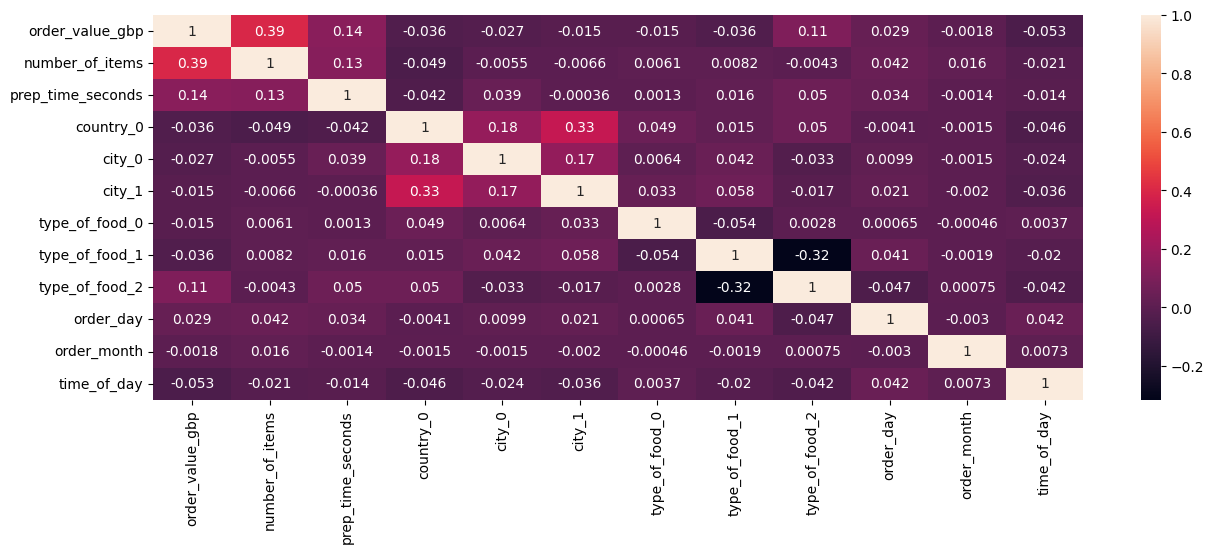

In [48]:
plt.figure(figsize=(15, 5))
sns.heatmap(encoded_data.corr(), annot=True)
# From this heatmap we can clearly see the relation between different features

##### Building ML model

In [49]:
# Selecting X & y for model building
X=encoded_data.drop('prep_time_seconds',axis=1)
y=df['prep_time_seconds']

In [50]:
# Performing feature selections
sfs_selector = SequentialFeatureSelector(estimator=XGBRegressor(), n_features_to_select = 6, cv =10, direction ='backward')
sfs_selector.fit(X, y)
selected_cols=list(X.columns[sfs_selector.get_support()])
X=encoded_data[selected_cols]

In [51]:
# Splitting the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [52]:
# Creation regressor and performing hyper-parameter tuning using grid search
regressor=XGBRegressor(eval_metric='rmsle')
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}


In [53]:
# creating regressor model using those hyper-parameters and training it on train dataset
regressor=XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],)

regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [54]:
# Prediction for test dataset
predictions = regressor.predict(X_test)

In [55]:
# calculating RMSLE to check model performance
RMSLE = np.sqrt( mean_squared_log_error(y_test, predictions) )
print("The score is %.5f" % RMSLE )

The score is 0.46358


In [56]:
y_pred=regressor.predict(X)

In [59]:
y_pred

array([1064.6487 ,  921.3776 ,  794.88025, ..., 1144.6497 ,  889.24445,
        988.721  ], dtype=float32)

In [64]:
pd.concat([X,y,pd.Series(y_pred)],axis=1).to_csv('Output.csv',header=True,index=False)